In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from pathlib import Path
import visualization as vis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
dataset_load = sp.io.loadmat('dataset/results_dfnc_clusters_Batch50_subject500.mat')

clusters_batchs = np.squeeze(dataset_load['clusters_batch_ica'])


In [22]:

num_clusters = clusters_batchs.shape[0]
cluster_maps = []

for cluster in range(num_clusters):
    cluster_var = clusters_batchs[cluster,:]
    cluster_var_mat = vis.vec2mat(cluster_var)
    # print(f"shape: sample_var_mat {cluster_var_mat.shape}")
    cluster_var_ordered = vis.getOrderedMap(cluster_var_mat)
    cluster_var_ordered_normalized = vis.normalization(cluster_var_ordered)
    # print(f"shape: cluster_var_ordered {cluster_var_ordered_normalized.shape}")
    cluster_maps.append(cluster_var_ordered_normalized)


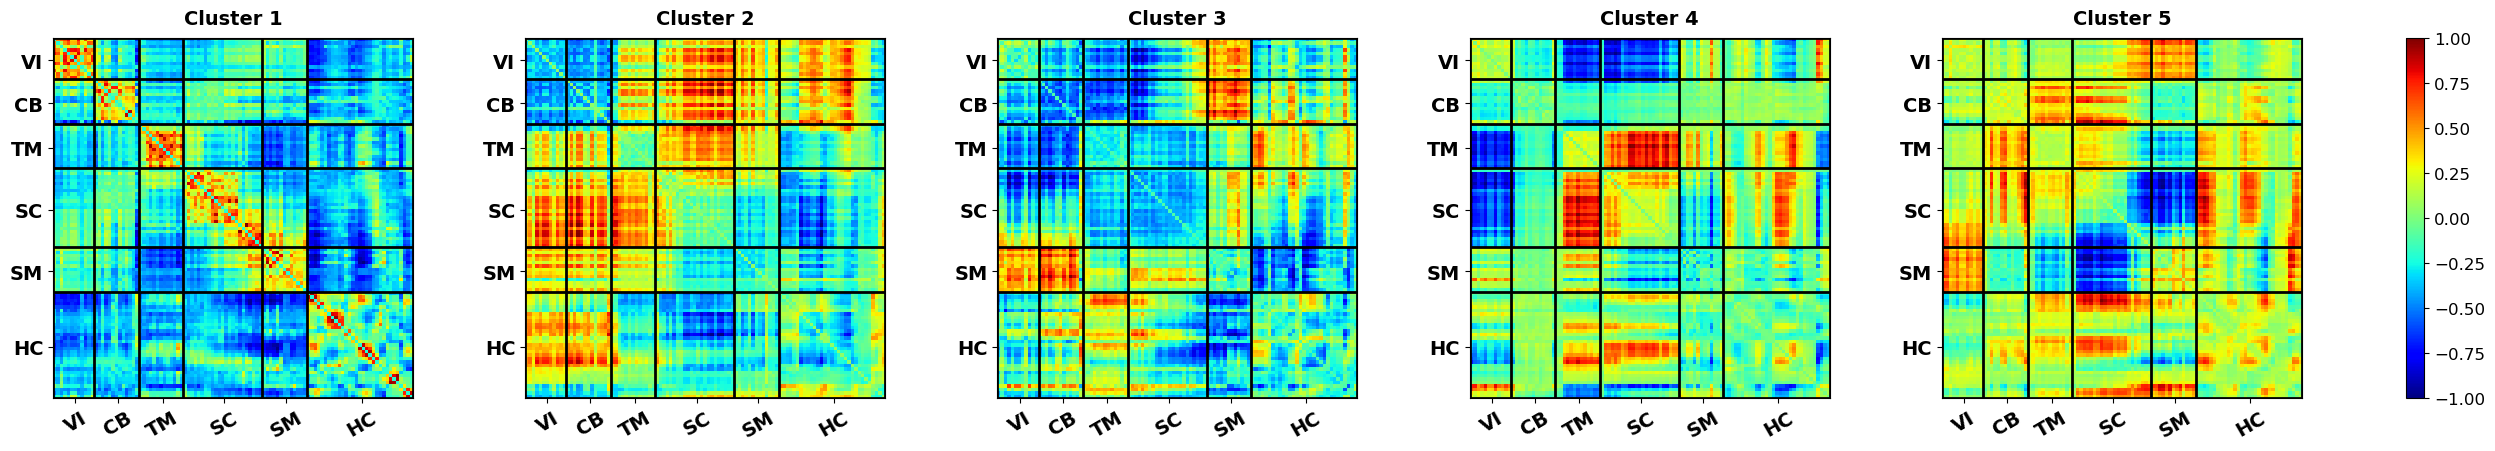

In [23]:

titles = [f'Cluster {i+1}' for i in range(5)]

try:
    # For Python scripts
    current_dir = Path(__file__).parent
except NameError:
    # For Jupyter notebooks
    current_dir = Path().absolute()

plot_save_path = current_dir / "examples" / "maps_clusters_ica_batch50.png"
plot_dpi = 600

# Call the batch function
vis.show_map_batch(
    map_data_list=cluster_maps,
    plot_titles=titles,
    rows=1,
    cols=5,
    single_colorbar=True, save_path=plot_save_path, dpi=plot_dpi
)